# Structured and time series data

In [1]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)


In [2]:
%matplotlib inline%reload_ext autoreload
%autoreload 2

UsageError: unrecognized arguments: autoreload


In [3]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/smartmeters/'

## Create datasets

In [4]:
file='weather_daily_darksky.csv'
df_weather_daily=pd.read_csv(PATH+file)


In [5]:
df_weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,15.57,11/1/2011 15:00,208,partly-cloudy-day,10.13,11/1/2011 22:00,0.36,2.45,1009.46,11/1/2011 22:00,...,15.57,11/1/2011 6:54,11/1/2011 15:00,11/1/2011 10:00,Partly cloudy until evening.,11/2/2011 3:00,9.01,11/1/2011 15:00,11/2/2011 3:00,0.21
1,15.19,11/2/2011 23:00,134,partly-cloudy-night,10.23,11/2/2011 3:00,0.39,4.39,1004.79,11/2/2011 3:00,...,15.06,11/2/2011 6:56,11/2/2011 13:00,11/2/2011 9:00,Partly cloudy throughout the day.,11/2/2011 19:00,7.33,11/2/2011 23:00,11/2/2011 19:00,0.24
2,17.41,11/3/2011 14:00,154,partly-cloudy-day,13.39,11/3/2011 21:00,0.52,3.99,993.40,11/3/2011 21:00,...,17.41,11/3/2011 6:58,11/3/2011 14:00,11/3/2011 10:00,Partly cloudy throughout the day.,11/4/2011 7:00,12.79,11/3/2011 14:00,11/4/2011 7:00,0.27
3,15.54,11/4/2011 11:00,179,fog,12.03,11/4/2011 23:00,0.50,2.62,995.54,11/4/2011 23:00,...,15.54,11/4/2011 6:59,11/4/2011 11:00,11/4/2011 10:00,Foggy overnight.,11/5/2011 2:00,11.53,11/4/2011 11:00,11/5/2011 2:00,0.31
4,13.94,11/5/2011 15:00,346,fog,10.96,11/5/2011 2:00,0.65,2.70,1007.39,11/5/2011 2:00,...,13.94,11/5/2011 7:01,11/5/2011 15:00,11/5/2011 10:00,Foggy in the morning.,11/6/2011 5:00,10.17,11/5/2011 15:00,11/6/2011 6:00,0.34


In [6]:
df_weather_daily["time"]=pd.to_datetime(df_weather_daily["time"])
df_weather_daily=df_weather_daily.sort_values(["time"])
#df_weather_daily.columns

In [7]:
df_weather_daily["day"]=df_weather_daily.apply(lambda row:row["time"].strftime("%Y-%m-%d"),axis=1)
df_weather_daily.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'day'],
      dtype='object')

In [8]:
df_weather_daily["temperatureMean"]=df_weather_daily.apply(lambda row:(row["temperatureMax"]+row["temperatureMin"])/2,axis=1)
df_weather_daily=df_weather_daily.drop_duplicates(["day"])
#df_weather_daily=df_weather_daily.set_index(("day"))
df_weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,day,temperatureMean
0,15.57,11/1/2011 15:00,208,partly-cloudy-day,10.13,11/1/2011 22:00,0.36,2.45,1009.46,11/1/2011 22:00,...,11/1/2011 15:00,11/1/2011 10:00,Partly cloudy until evening.,11/2/2011 3:00,9.01,11/1/2011 15:00,11/2/2011 3:00,0.21,2011-11-01,12.625
1,15.19,11/2/2011 23:00,134,partly-cloudy-night,10.23,11/2/2011 3:00,0.39,4.39,1004.79,11/2/2011 3:00,...,11/2/2011 13:00,11/2/2011 9:00,Partly cloudy throughout the day.,11/2/2011 19:00,7.33,11/2/2011 23:00,11/2/2011 19:00,0.24,2011-11-02,12.035
2,17.41,11/3/2011 14:00,154,partly-cloudy-day,13.39,11/3/2011 21:00,0.52,3.99,993.40,11/3/2011 21:00,...,11/3/2011 14:00,11/3/2011 10:00,Partly cloudy throughout the day.,11/4/2011 7:00,12.79,11/3/2011 14:00,11/4/2011 7:00,0.27,2011-11-03,15.100
3,15.54,11/4/2011 11:00,179,fog,12.03,11/4/2011 23:00,0.50,2.62,995.54,11/4/2011 23:00,...,11/4/2011 11:00,11/4/2011 10:00,Foggy overnight.,11/5/2011 2:00,11.53,11/4/2011 11:00,11/5/2011 2:00,0.31,2011-11-04,13.535
4,13.94,11/5/2011 15:00,346,fog,10.96,11/5/2011 2:00,0.65,2.70,1007.39,11/5/2011 2:00,...,11/5/2011 15:00,11/5/2011 10:00,Foggy in the morning.,11/6/2011 5:00,10.17,11/5/2011 15:00,11/6/2011 6:00,0.34,2011-11-05,12.055


In [8]:
df_weather_daily.temperatureMax.count()

882

In [9]:
file='block_0.csv'
PATH_block_hh='data/smartmeters//hhblock_dataset/hhblock_dataset/'
block_hh=pd.read_csv(PATH_block_hh+file)

PATH_block_daily='data/smartmeters//daily_dataset/daily_dataset/'
block_daily  = pd.read_csv(PATH_block_daily+file)

In [291]:
files= ['block_0.csv','block_1.csv']
blocks=[]
PATH_block_daily='data/smartmeters//daily_dataset/daily_dataset/'
for f in files: 
    blocks.append(pd.read_csv(PATH_block_daily+f))
block_daily_all = pd.concat(blocks)
    



In [292]:
len(block_daily_all)

57305

In [10]:
block_daily.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,MAC000002,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,MAC000002,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,MAC000002,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [11]:
DataFrameSummary(block_daily).summary()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,NaN,NaN,25574,25574,25574,25574,25496,25574,25574
mean,NaN,NaN,0.366426,0.450346,1.34815,47.8071,0.282705,21.5438,0.167271
std,NaN,NaN,0.407172,0.421025,0.910607,2.77149,0.201086,20.205,0.255782
min,NaN,NaN,0.007,0.012,0.012,1,0.00249885,0.012,0
25%,NaN,NaN,0.1455,0.213896,0.732,48,0.138956,10.231,0.05
50%,NaN,NaN,0.2315,0.318958,1.173,48,0.243201,15.26,0.091
75%,NaN,NaN,0.4065,0.528979,1.762,48,0.384356,25.3328,0.159
max,NaN,NaN,5.522,5.79112,8.171,48,2.55737,277.974,5.052
counts,25574,25574,25574,25574,25574,25574,25496,25574,25574
uniques,50,819,3878,23110,3924,22,25474,23383,1343


In [13]:
block_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25574 entries, 0 to 25573
Data columns (total 9 columns):
LCLid            25574 non-null object
day              25574 non-null object
energy_median    25574 non-null float64
energy_mean      25574 non-null float64
energy_max       25574 non-null float64
energy_count     25574 non-null int64
energy_std       25496 non-null float64
energy_sum       25574 non-null float64
energy_min       25574 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.8+ MB


In [12]:
get_householdid=list(block_daily["LCLid"].unique())

# Merging daily_dataset consumption with weather data

In [13]:
df_weather_daily["temperatureMean"]=df_weather_daily.apply(lambda row:(row["temperatureMax"]+row["temperatureMin"])/2,axis=1)

In [14]:
dict_result={}
for household in tqdm(get_householdid[:10]):
    df_household=block_daily[block_daily["LCLid"]==household]
  #df_cross=pd.concat([df_household,df_weather_daily],axis=1, keys=["day"])
    df_cross = pd.merge(left=df_household,right=df_weather_daily, how='left', left_on='day', right_on='day')
    dict_result[household]= df_cross
  

100%|██████████| 10/10 [00:00<00:00, 54.40it/s]


In [99]:
dict_result[household]


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,temperatureMax,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,MAC003348,2012-12-11,0.2720,0.350489,1.193,47,0.315204,16.473,0.035,2.70,...,12/11/2012 7:57,12/11/2012 14:00,12/11/2012 10:00,Foggy starting in the evening.,12/12/2012 7:00,-2.49,12/11/2012 16:00,12/12/2012 7:00,0.93,0.105
1,MAC003348,2012-12-12,0.2615,0.346042,1.885,48,0.387275,16.610,0.032,1.80,...,12/12/2012 7:58,12/12/2012 16:00,12/12/2012 10:00,Partly cloudy until evening.,12/13/2012 7:00,-3.83,12/12/2012 16:00,12/13/2012 7:00,0.97,-1.015
2,MAC003348,2012-12-13,0.2460,0.305771,1.186,48,0.257793,14.677,0.038,1.58,...,12/13/2012 7:59,12/13/2012 14:00,12/13/2012 11:00,Foggy overnight.,12/13/2012 20:00,-3.72,12/13/2012 14:00,12/13/2012 22:00,0.01,0.115
3,MAC003348,2012-12-14,0.2945,0.274958,0.737,48,0.188824,13.198,0.034,10.34,...,12/14/2012 8:00,12/14/2012 16:00,12/14/2012 0:00,Foggy in the morning and breezy in the evening.,12/15/2012 4:00,-0.92,12/14/2012 16:00,12/15/2012 3:00,0.05,6.135
4,MAC003348,2012-12-15,0.1920,0.225313,0.996,48,0.192894,10.815,0.033,11.17,...,12/15/2012 8:01,12/15/2012 12:00,12/15/2012 11:00,Partly cloudy throughout the day.,12/16/2012 3:00,4.32,12/15/2012 12:00,12/16/2012 3:00,0.08,9.040
5,MAC003348,2012-12-16,0.2105,0.231375,0.939,48,0.179000,11.106,0.034,9.82,...,12/16/2012 8:02,12/16/2012 13:00,12/16/2012 11:00,Partly cloudy throughout the day.,12/17/2012 5:00,3.01,12/16/2012 13:00,12/17/2012 8:00,0.12,7.570
6,MAC003348,2012-12-17,0.2125,0.286813,1.205,48,0.265193,13.767,0.043,9.10,...,12/17/2012 8:02,12/17/2012 14:00,12/17/2012 11:00,Partly cloudy throughout the day.,12/18/2012 1:00,3.08,12/17/2012 14:00,12/18/2012 1:00,0.15,7.360
7,MAC003348,2012-12-18,0.2645,0.308000,1.685,48,0.291721,14.784,0.037,7.96,...,12/18/2012 8:03,12/18/2012 14:00,12/18/2012 0:00,Mostly cloudy throughout the day.,12/19/2012 1:00,2.47,12/18/2012 17:00,12/19/2012 5:00,0.19,6.310
8,MAC003348,2012-12-19,0.2475,0.304583,1.743,48,0.333493,14.620,0.033,7.44,...,12/19/2012 8:04,12/19/2012 12:00,12/19/2012 11:00,Mostly cloudy throughout the day.,12/19/2012 19:00,0.96,12/19/2012 12:00,12/19/2012 20:00,0.22,5.255
9,MAC003348,2012-12-20,0.2670,0.278021,0.918,48,0.201617,13.345,0.028,9.57,...,12/20/2012 8:04,12/20/2012 19:00,12/20/2012 0:00,Mostly cloudy throughout the day.,12/21/2012 3:00,2.82,12/20/2012 18:00,12/21/2012 3:00,0.26,8.050


In [15]:
df_cross.columns

Index(['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max',
       'energy_count', 'energy_std', 'energy_sum', 'energy_min',
       'temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'temperatureMean'],
      dtype='object')

In [16]:
df_cross[['day', 'energy_sum','windSpeed']]

,day,energy_sum,windSpeed
0,2012-12-11,16.473,1.67
1,2012-12-12,16.610,0.73
2,2012-12-13,14.677,2.09
3,2012-12-14,13.198,4.22
4,2012-12-15,10.815,4.93
5,2012-12-16,11.106,3.07
6,2012-12-17,13.767,3.79
7,2012-12-18,14.784,2.17
8,2012-12-19,14.620,4.02
9,2012-12-20,13.345,3.54


# Plotting graph between temperature mean and total energy consumed for 10 households of block0

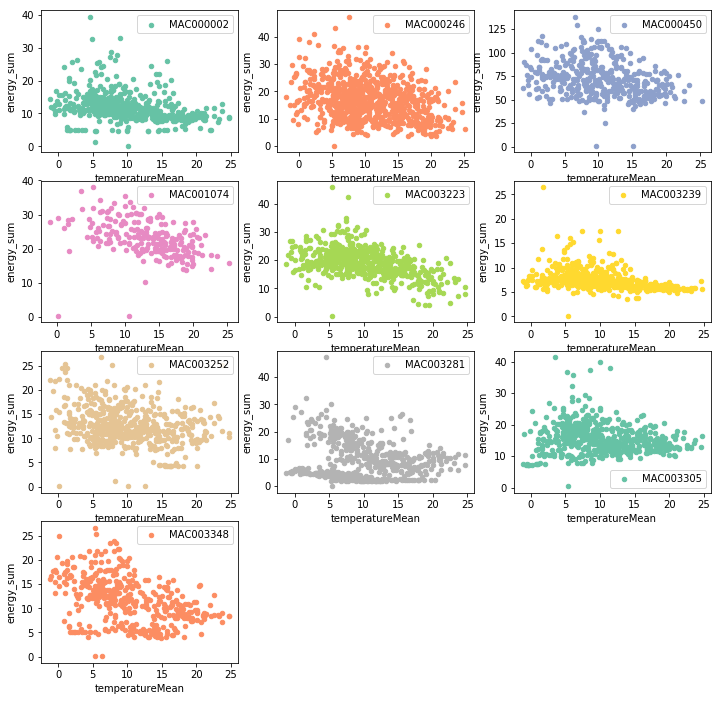

In [17]:
fig,ax=plt.subplots(figsize=(12,12))
palette=sns.color_palette("Set2", len(list(dict_result.keys())))
for i,household in enumerate(dict_result):
    ax=plt.subplot(4,3,i+1)
    dict_result[household].plot(ax=ax,x="temperatureMean",y=('energy_sum'),kind="scatter",color=palette[i],label=household)
plt.legend()
plt.show()

## Aggregating daily_energy data by day

In [18]:
block_daily_agg = block_daily.drop(['LCLid'], axis = 1)

In [19]:
block_daily_agg.head()

,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0.000
1,2012-10-13,0.1800,0.230979,0.933,48,0.192329,11.087,0.076
2,2012-10-14,0.1580,0.275479,1.085,48,0.274647,13.223,0.070
3,2012-10-15,0.1310,0.213688,1.164,48,0.224483,10.257,0.070
4,2012-10-16,0.1450,0.203521,0.991,48,0.184115,9.769,0.087


In [20]:
block_daily_agg_raw = block_daily_agg

In [21]:
block_daily_agg = block_daily_agg[['day', 'energy_sum']]
len(block_daily_agg)

25574

In [22]:
block_daily_agg = block_daily_agg.groupby(['day']).sum().reset_index()

In [23]:
block_daily_mean = block_daily_agg_raw[['day', 'energy_mean']]
block_daily_mean = block_daily_mean.groupby(['day']).mean().reset_index()

In [24]:
len(block_daily_mean)

819

In [25]:
block_daily_agg.describe()

,energy_sum
count,819.000000
mean,672.724883
std,428.824474
min,3.938000
25%,267.504000
50%,814.753001
75%,1036.354501
max,1505.642999


In [26]:
block_daily_mean.describe()

,energy_mean
count,819.000000
mean,0.449247
std,0.123405
min,0.082042
25%,0.361383
50%,0.468396
75%,0.531729
max,0.768664


In [27]:
block_daily_agg = pd.merge(left=block_daily_agg,right=block_daily_mean, how='left', left_on='day', right_on='day')

In [27]:
block_daily_agg.head()

,day,energy_sum,energy_mean
0,2011-12-03,9.007,0.300233
1,2011-12-04,20.763,0.432563
2,2011-12-05,6.020,0.125417
3,2011-12-06,13.322,0.277542
4,2011-12-07,9.062,0.188792


In [28]:
file1 = 'uk_bank_holidays.csv'
PATH_holiday='data/smartmeters/'
holiday  = pd.read_csv(PATH_holiday+file1)

In [29]:
holiday.head()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [30]:
agg_holiday = pd.merge(left=block_daily_agg,right=holiday, how='left', left_on='day', right_on='Bank holidays')

In [31]:
agg_holiday.describe()

,energy_sum,energy_mean
count,819.000000,819.000000
mean,672.724883,0.449247
std,428.824474,0.123405
min,3.938000,0.082042
25%,267.504000,0.361383
50%,814.753001,0.468396
75%,1036.354501,0.531729
max,1505.642999,0.768664


# ## merging with weather data

In [32]:
agg_holiday_weather = pd.merge(left=agg_holiday,right=df_weather_daily, how='left', left_on='day', right_on='day')

In [33]:
agg_holiday_weather.head()

,day,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,2011-12-03,9.007,0.300233,NaN,NaN,11.42,12/3/2011 10:00,247.0,partly-cloudy-day,6.58,...,12/3/2011 7:47,12/3/2011 10:00,12/3/2011 11:00,Partly cloudy throughout the day.,12/4/2011 6:00,4.71,12/3/2011 10:00,12/4/2011 5:00,0.28,9.770
1,2011-12-04,20.763,0.432563,NaN,NaN,9.11,12/4/2011 13:00,254.0,partly-cloudy-day,4.87,...,12/4/2011 7:48,12/4/2011 13:00,12/4/2011 10:00,Partly cloudy until evening.,12/5/2011 8:00,1.03,12/4/2011 14:00,12/5/2011 8:00,0.31,6.900
2,2011-12-05,6.020,0.125417,NaN,NaN,6.87,12/5/2011 13:00,254.0,partly-cloudy-day,0.84,...,12/5/2011 7:50,12/5/2011 13:00,12/5/2011 10:00,Partly cloudy until evening.,12/6/2011 1:00,-1.69,12/5/2011 15:00,12/6/2011 5:00,0.34,4.840
3,2011-12-06,13.322,0.277542,NaN,NaN,6.91,12/6/2011 14:00,245.0,partly-cloudy-day,2.15,...,12/6/2011 7:51,12/6/2011 14:00,12/6/2011 11:00,Partly cloudy until evening.,12/6/2011 22:00,-1.61,12/6/2011 16:00,12/6/2011 22:00,0.37,4.795
4,2011-12-07,9.062,0.188792,NaN,NaN,9.02,12/7/2011 12:00,263.0,wind,1.79,...,12/7/2011 7:52,12/7/2011 12:00,12/7/2011 10:00,Partly cloudy throughout the day and breezy un...,12/8/2011 2:00,0.94,12/7/2011 4:00,12/8/2011 0:00,0.40,6.965


In [36]:
agg_holiday_weather.columns

Index(['day', 'energy_sum', 'energy_mean', 'Bank holidays', 'Type',
       'temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'temperatureMean'],
      dtype='object')

In [34]:
agg_holiday_weather['Bank holidays'] .fillna('noholiday', inplace=True); 
agg_holiday_weather.head()

,day,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,2011-12-03,9.007,0.300233,noholiday,NaN,11.42,12/3/2011 10:00,247.0,partly-cloudy-day,6.58,...,12/3/2011 7:47,12/3/2011 10:00,12/3/2011 11:00,Partly cloudy throughout the day.,12/4/2011 6:00,4.71,12/3/2011 10:00,12/4/2011 5:00,0.28,9.770
1,2011-12-04,20.763,0.432563,noholiday,NaN,9.11,12/4/2011 13:00,254.0,partly-cloudy-day,4.87,...,12/4/2011 7:48,12/4/2011 13:00,12/4/2011 10:00,Partly cloudy until evening.,12/5/2011 8:00,1.03,12/4/2011 14:00,12/5/2011 8:00,0.31,6.900
2,2011-12-05,6.020,0.125417,noholiday,NaN,6.87,12/5/2011 13:00,254.0,partly-cloudy-day,0.84,...,12/5/2011 7:50,12/5/2011 13:00,12/5/2011 10:00,Partly cloudy until evening.,12/6/2011 1:00,-1.69,12/5/2011 15:00,12/6/2011 5:00,0.34,4.840
3,2011-12-06,13.322,0.277542,noholiday,NaN,6.91,12/6/2011 14:00,245.0,partly-cloudy-day,2.15,...,12/6/2011 7:51,12/6/2011 14:00,12/6/2011 11:00,Partly cloudy until evening.,12/6/2011 22:00,-1.61,12/6/2011 16:00,12/6/2011 22:00,0.37,4.795
4,2011-12-07,9.062,0.188792,noholiday,NaN,9.02,12/7/2011 12:00,263.0,wind,1.79,...,12/7/2011 7:52,12/7/2011 12:00,12/7/2011 10:00,Partly cloudy throughout the day and breezy un...,12/8/2011 2:00,0.94,12/7/2011 4:00,12/8/2011 0:00,0.40,6.965


In [35]:
agg_holiday_weather['Bank holidays']= agg_holiday_weather['Bank holidays']!='noholiday'
agg_holiday_weather.head()

,day,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,2011-12-03,9.007,0.300233,False,NaN,11.42,12/3/2011 10:00,247.0,partly-cloudy-day,6.58,...,12/3/2011 7:47,12/3/2011 10:00,12/3/2011 11:00,Partly cloudy throughout the day.,12/4/2011 6:00,4.71,12/3/2011 10:00,12/4/2011 5:00,0.28,9.770
1,2011-12-04,20.763,0.432563,False,NaN,9.11,12/4/2011 13:00,254.0,partly-cloudy-day,4.87,...,12/4/2011 7:48,12/4/2011 13:00,12/4/2011 10:00,Partly cloudy until evening.,12/5/2011 8:00,1.03,12/4/2011 14:00,12/5/2011 8:00,0.31,6.900
2,2011-12-05,6.020,0.125417,False,NaN,6.87,12/5/2011 13:00,254.0,partly-cloudy-day,0.84,...,12/5/2011 7:50,12/5/2011 13:00,12/5/2011 10:00,Partly cloudy until evening.,12/6/2011 1:00,-1.69,12/5/2011 15:00,12/6/2011 5:00,0.34,4.840
3,2011-12-06,13.322,0.277542,False,NaN,6.91,12/6/2011 14:00,245.0,partly-cloudy-day,2.15,...,12/6/2011 7:51,12/6/2011 14:00,12/6/2011 11:00,Partly cloudy until evening.,12/6/2011 22:00,-1.61,12/6/2011 16:00,12/6/2011 22:00,0.37,4.795
4,2011-12-07,9.062,0.188792,False,NaN,9.02,12/7/2011 12:00,263.0,wind,1.79,...,12/7/2011 7:52,12/7/2011 12:00,12/7/2011 10:00,Partly cloudy throughout the day and breezy un...,12/8/2011 2:00,0.94,12/7/2011 4:00,12/8/2011 0:00,0.40,6.965


In [36]:
agg_holiday_weather['day'] = pd.to_datetime(agg_holiday_weather['day'], format='%Y-%m-%d')

In [105]:
#agg_holiday_weather['day'].unique

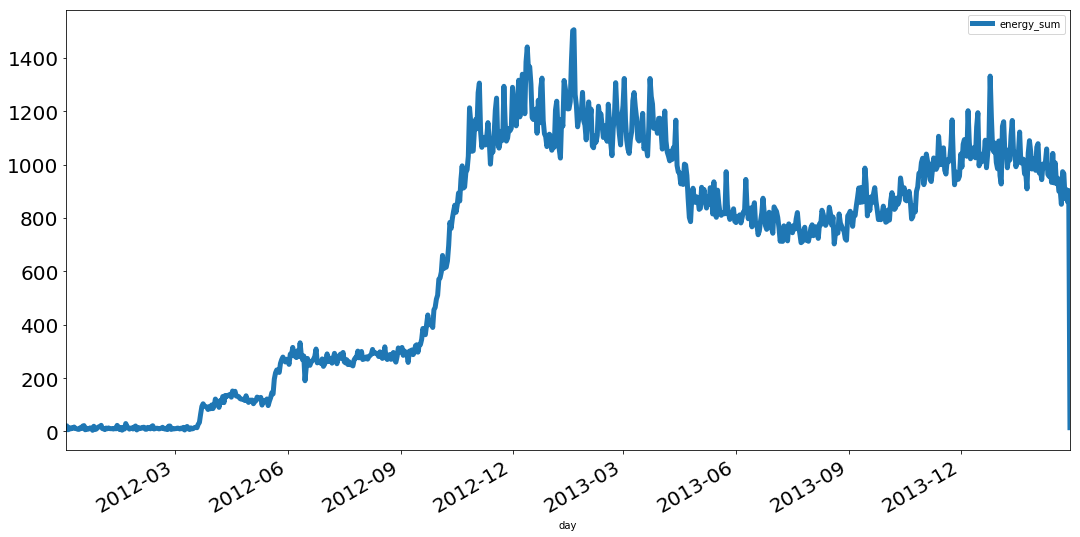

In [37]:
agg_holiday_weather.plot.line(x = 'day', y = 'energy_sum',  figsize=(18,9), linewidth=5, fontsize=20)
plt.show()

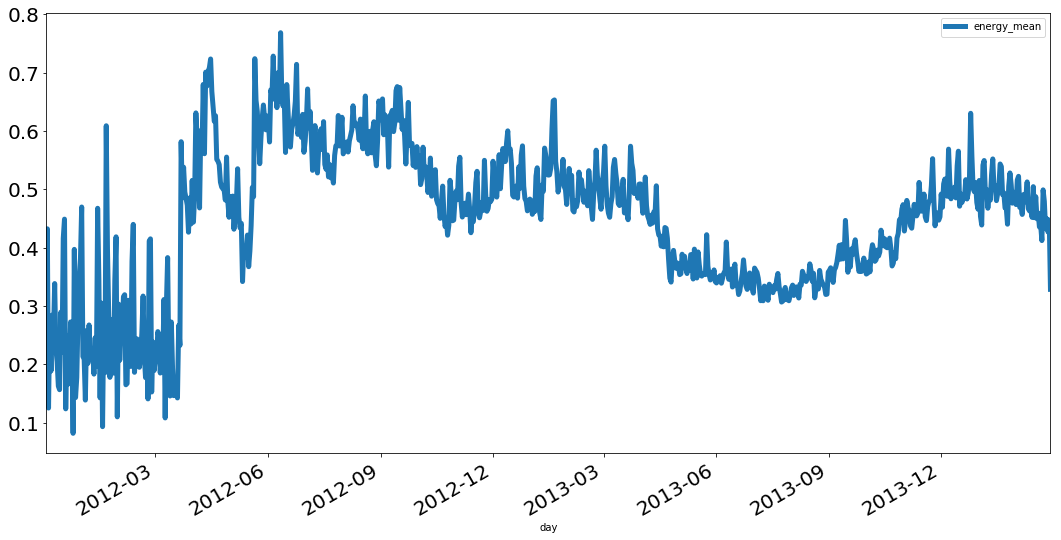

In [92]:
agg_holiday_weather.plot.line(x = 'day', y = 'energy_mean',  figsize=(18,9), linewidth=5, fontsize=20)
plt.show()

In [39]:
df=agg_holiday_weather
date = df['day']

In [63]:
#df.day

In [40]:
temp= pd.DatetimeIndex(date)
month = pd.Series(temp.month)

In [41]:
to_be_plotted  = df.drop(['day'], axis = 1)

In [42]:
to_be_plotted.columns

Index(['energy_sum', 'energy_mean', 'Bank holidays', 'Type', 'temperatureMax',
       'temperatureMaxTime', 'windBearing', 'icon', 'dewPoint',
       'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'temperatureMean'],
      dtype='object')

In [67]:
len(to_be_plotted)

819

In [43]:
to_be_plotted1 = to_be_plotted.join(month)


In [44]:
len(to_be_plotted1)

821

In [45]:
to_be_plotted1.columns
## doubt: when we are joining by month then why the new column has been renamed as day.

Index(['energy_sum', 'energy_mean', 'Bank holidays', 'Type', 'temperatureMax',
       'temperatureMaxTime', 'windBearing', 'icon', 'dewPoint',
       'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'temperatureMean', 'day'],
      dtype='object')

In [46]:
to_be_plotted1.rename(columns={'day': 'month'}, inplace=True)

In [47]:
to_be_plotted1.head()

,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,...,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean,month
0,9.007,0.300233,False,NaN,11.42,12/3/2011 10:00,247.0,partly-cloudy-day,6.58,12/3/2011 22:00,...,12/3/2011 10:00,12/3/2011 11:00,Partly cloudy throughout the day.,12/4/2011 6:00,4.71,12/3/2011 10:00,12/4/2011 5:00,0.28,9.770,12
1,20.763,0.432563,False,NaN,9.11,12/4/2011 13:00,254.0,partly-cloudy-day,4.87,12/4/2011 23:00,...,12/4/2011 13:00,12/4/2011 10:00,Partly cloudy until evening.,12/5/2011 8:00,1.03,12/4/2011 14:00,12/5/2011 8:00,0.31,6.900,12
2,6.020,0.125417,False,NaN,6.87,12/5/2011 13:00,254.0,partly-cloudy-day,0.84,12/5/2011 8:00,...,12/5/2011 13:00,12/5/2011 10:00,Partly cloudy until evening.,12/6/2011 1:00,-1.69,12/5/2011 15:00,12/6/2011 5:00,0.34,4.840,12
3,13.322,0.277542,False,NaN,6.91,12/6/2011 14:00,245.0,partly-cloudy-day,2.15,12/6/2011 1:00,...,12/6/2011 14:00,12/6/2011 11:00,Partly cloudy until evening.,12/6/2011 22:00,-1.61,12/6/2011 16:00,12/6/2011 22:00,0.37,4.795,12
4,9.062,0.188792,False,NaN,9.02,12/7/2011 12:00,263.0,wind,1.79,12/7/2011 23:00,...,12/7/2011 12:00,12/7/2011 10:00,Partly cloudy throughout the day and breezy un...,12/8/2011 2:00,0.94,12/7/2011 4:00,12/8/2011 0:00,0.40,6.965,12


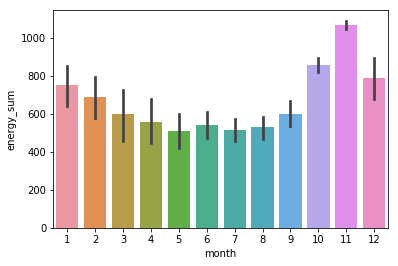

In [48]:
sns.barplot(x = 'month', y = 'energy_sum', data = to_be_plotted1)
plt.show()

In [ ]:
# the above graph shows that the total energy consumption is high in October to December.

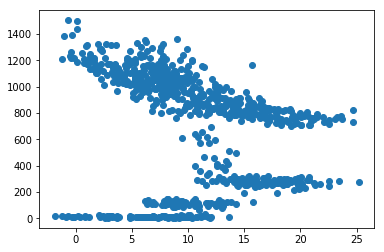

In [49]:
matplotlib.pyplot.scatter(x='temperatureMean', y='energy_sum', data=to_be_plotted1)
plt.show()

In [74]:
## the above graph shows when the avg temperature is low , energy is consumed maximum

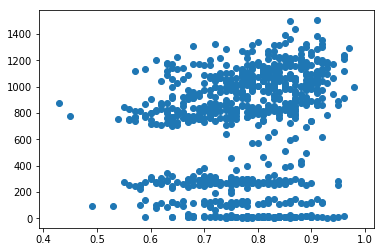

In [50]:
matplotlib.pyplot.scatter(x='humidity', y='energy_sum', data=to_be_plotted1)
plt.show()

In [51]:
to_be_plotted1['energy_sum'].corr(to_be_plotted1['humidity'])

0.16707189638676337

In [52]:
to_be_plotted1['energy_sum'].corr(to_be_plotted1['temperatureMean'])

-0.25443465912476226

In [53]:
to_be_plotted1['energy_sum'].corr(to_be_plotted1['apparentTemperatureMin'])

-0.22948834614815941

In [54]:
to_be_plotted1['energy_mean'].corr(to_be_plotted1['temperatureMean'])

0.044674025913054069

In [ ]:
# as shown in graph the there is negative correlation between mean temperature and total energy consumed in a day. There is very
# little correlation between humidity and total enery. As expected negative correlation between apparentTemperatureMin and 
# apparentTemperatureMAx with total energy_consumed

In [55]:
df.head()

,day,energy_sum,energy_mean,Bank holidays,Type,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,...,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,temperatureMean
0,2011-12-03,9.007,0.300233,False,NaN,11.42,12/3/2011 10:00,247.0,partly-cloudy-day,6.58,...,12/3/2011 7:47,12/3/2011 10:00,12/3/2011 11:00,Partly cloudy throughout the day.,12/4/2011 6:00,4.71,12/3/2011 10:00,12/4/2011 5:00,0.28,9.770
1,2011-12-04,20.763,0.432563,False,NaN,9.11,12/4/2011 13:00,254.0,partly-cloudy-day,4.87,...,12/4/2011 7:48,12/4/2011 13:00,12/4/2011 10:00,Partly cloudy until evening.,12/5/2011 8:00,1.03,12/4/2011 14:00,12/5/2011 8:00,0.31,6.900
2,2011-12-05,6.020,0.125417,False,NaN,6.87,12/5/2011 13:00,254.0,partly-cloudy-day,0.84,...,12/5/2011 7:50,12/5/2011 13:00,12/5/2011 10:00,Partly cloudy until evening.,12/6/2011 1:00,-1.69,12/5/2011 15:00,12/6/2011 5:00,0.34,4.840
3,2011-12-06,13.322,0.277542,False,NaN,6.91,12/6/2011 14:00,245.0,partly-cloudy-day,2.15,...,12/6/2011 7:51,12/6/2011 14:00,12/6/2011 11:00,Partly cloudy until evening.,12/6/2011 22:00,-1.61,12/6/2011 16:00,12/6/2011 22:00,0.37,4.795
4,2011-12-07,9.062,0.188792,False,NaN,9.02,12/7/2011 12:00,263.0,wind,1.79,...,12/7/2011 7:52,12/7/2011 12:00,12/7/2011 10:00,Partly cloudy throughout the day and breezy un...,12/8/2011 2:00,0.94,12/7/2011 4:00,12/8/2011 0:00,0.40,6.965


In [56]:
df.columns

Index(['day', 'energy_sum', 'energy_mean', 'Bank holidays', 'Type',
       'temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'temperatureMean'],
      dtype='object')

In [193]:
list(df['precipType'].unique())

['rain', 'snow', nan]

In [57]:
final_DL_dataset  = df.drop(['Type','energy_mean','temperatureMaxTime','icon','temperatureMinTime','apparentTemperatureMinTime',
                                       'apparentTemperatureHighTime', 'time','sunsetTime',
                                       'sunriseTime','temperatureHighTime','uvIndexTime','summary','temperatureLowTime',
                                      'apparentTemperatureMaxTime', 'apparentTemperatureLowTime' ], axis = 1)

In [58]:
final_DL_dataset.columns

Index(['day', 'energy_sum', 'Bank holidays', 'temperatureMax', 'windBearing',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'temperatureMean'],
      dtype='object')

adding variables like month, year, day of week, day of year etc from day variable

In [59]:
add_datepart(final_DL_dataset, "day", drop=False)

In [61]:
??add_datepart

In [60]:
final_DL_dataset.columns

Index(['day', 'energy_sum', 'Bank holidays', 'temperatureMax', 'windBearing',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'precipType', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'temperatureMean', 'dayYear',
       'dayMonth', 'dayWeek', 'dayDay', 'dayDayofweek', 'dayDayofyear',
       'dayIs_month_end', 'dayIs_month_start', 'dayIs_quarter_end',
       'dayIs_quarter_start', 'dayIs_year_end', 'dayIs_year_start',
       'dayElapsed'],
      dtype='object')

In [252]:
final_DL_dataset  = final_DL_dataset.drop(['dayElapsed'], axis=1)

In [62]:
cat_vars = ['Bank holidays','precipType', 'dayMonth', 'dayDayofyear','dayYear','dayWeek', 'dayDay', 'dayDayofweek',
       'dayIs_month_end', 'dayIs_month_start',
       'dayIs_quarter_end', 'dayIs_quarter_start', 'dayIs_year_end',
       'dayIs_year_start']

contin_vars = ['temperatureMax','windBearing', 'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh','visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'temperatureMean']
n = len(final_DL_dataset); n

821

In [63]:
for v in cat_vars: final_DL_dataset[v] = final_DL_dataset[v].astype('category').cat.as_ordered()
for v in contin_vars: final_DL_dataset[v] = final_DL_dataset[v].astype('float32')
dep = 'energy_sum'
final_DL_dataset = final_DL_dataset[cat_vars+contin_vars+[dep, 'day']]

In [64]:
final_DL_dataset.head(2)

,Bank holidays,precipType,dayMonth,dayDayofyear,dayYear,dayWeek,dayDay,dayDayofweek,dayIs_month_end,dayIs_month_start,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,temperatureMean,energy_sum,day
0,False,rain,12,337,2011,48,3,5,False,False,...,11.42,1.0,7.53,8.12,11.42,4.71,0.28,9.77,9.007,2011-12-03
1,False,rain,12,338,2011,48,4,6,False,False,...,6.66,1.0,2.81,4.69,9.11,1.03,0.31,6.90,20.763,2011-12-04


In [113]:
#final_DL_dataset.columns

In [65]:
final_DL_dataset1 = final_DL_dataset.set_index("day")

final_DL_dataset1.index = pd.to_datetime(final_DL_dataset1.index,format='%Y/%m/%d')

In [99]:
#from datetime import datetime
#final_DL_dataset1.day1=datetime.strftime(final_DL_dataset1['day'],'%b %d, %Y')

#final_DL_dataset1['month']=datetime.strftime(final_DL_dataset1('day1'),'%m')##




In [66]:
final_DL_dataset1.head(2)

,Bank holidays,precipType,dayMonth,dayDayofyear,dayYear,dayWeek,dayDay,dayDayofweek,dayIs_month_end,dayIs_month_start,...,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,temperatureMean,energy_sum
day,,,,,,,,,,,,,,,,,,,,,
2011-12-03,False,rain,12,337,2011,48,3,5,False,False,...,4.90,11.42,1.0,7.53,8.12,11.42,4.71,0.28,9.77,9.007
2011-12-04,False,rain,12,338,2011,48,4,6,False,False,...,-1.69,6.66,1.0,2.81,4.69,9.11,1.03,0.31,6.90,20.763


In [68]:
df1, y, nas, mapper = proc_df(final_DL_dataset1, 'energy_sum', do_scale=True)
yl = np.log(y)

In [138]:
df1.tail(2)

,Bank holidays,precipType,dayMonth,dayDayofyear,dayYear,dayWeek,dayDay,dayDayofweek,dayIs_month_end,dayIs_month_start,...,humidity_na,apparentTemperatureLow_na,apparentTemperatureMax_na,uvIndex_na,temperatureLow_na,temperatureMin_na,temperatureHigh_na,apparentTemperatureMin_na,moonPhase_na,temperatureMean_na
day,,,,,,,,,,,,,,,,,,,,,
2014-02-27,1,1,2,58,4,9,27,4,1,1,...,-0.049417,-0.049417,-0.049417,-0.06056,-0.049417,-0.049417,-0.049417,-0.049417,-0.049417,-0.049417
2014-02-28,1,1,2,59,4,9,28,5,2,1,...,-0.049417,-0.049417,-0.049417,-0.06056,-0.049417,-0.049417,-0.049417,-0.049417,-0.049417,-0.049417


In [70]:
train_ratio = 0.75
train_size = int(n * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [234]:
train_size

614

In [71]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [72]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df1, yl, cat_flds=cat_vars, bs=128)

In [73]:
cat_sz = [(c, len(final_DL_dataset1[c].cat.categories)+1) for c in cat_vars]

In [74]:
cat_sz

[('Bank holidays', 3),
 ('precipType', 3),
 ('dayMonth', 13),
 ('dayDayofyear', 367),
 ('dayYear', 5),
 ('dayWeek', 53),
 ('dayDay', 32),
 ('dayDayofweek', 8),
 ('dayIs_month_end', 3),
 ('dayIs_month_start', 3),
 ('dayIs_quarter_end', 3),
 ('dayIs_quarter_start', 3),
 ('dayIs_year_end', 3),
 ('dayIs_year_start', 3)]

In [75]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [76]:
emb_szs

[(3, 2),
 (3, 2),
 (13, 7),
 (367, 50),
 (5, 3),
 (53, 27),
 (32, 16),
 (8, 4),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2)]

In [77]:
m = md.get_learner(emb_szs, len(df1.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [78]:
m.lr_find()

A Jupyter Widget

[ 0.       8.87272  3.94256]                            



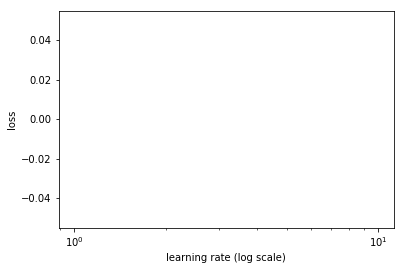

In [79]:
m.sched.plot(n_skip=0)
plt.show()

In [148]:
m = md.get_learner(emb_szs, len(df1.columns)-len(cat_vars),
                   0.60, 1, [1000,500], [0.70,0.50], y_range=y_range)
lr = 1e-4

In [149]:
m.fit(lr, 8, metrics=[exp_rmspe])

A Jupyter Widget

[ 0.       5.57092  1.2558   2.22612]           
[ 1.       5.28858  0.85669  2.36626]           
[ 2.       5.10554  1.00317  2.07916]           
[ 3.       4.93188  1.30878  1.75892]           
[ 4.       4.76681  1.57296  1.61201]           
[ 5.       4.78098  1.69179  1.64579]           
[ 6.       4.71902  1.64793  1.81806]           
[ 7.       4.63538  1.52325  2.09665]           



In [89]:
yval = yl[val_idx]
yval.shape

(206,)

In [85]:
??m.predict()

In [90]:
yp = m.predict().squeeze()
yp.shape

(206,)

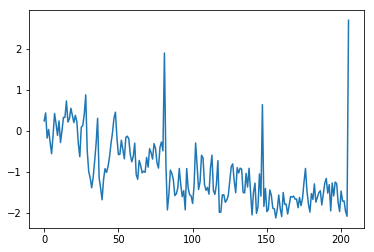

In [91]:

plt.plot(yp-yval)
plt.show()

In [92]:
m.fit(lr, 1, metrics=[exp_rmspe], cycle_len=1)

A Jupyter Widget

[ 0.       4.7039   1.47961  1.29496]           



In [93]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=2)

A Jupyter Widget

[ 0.       4.87992  1.05161  1.60861]           
[ 1.       4.69699  1.02337  1.64415]           
[ 2.       4.7063   1.11467  1.56996]           
[ 3.       4.6126   1.16822  1.5191 ]           



## RF

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
#((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df1.values, yl)

In [141]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()


n_valid = 200 
n_trn = len(df1)-n_valid
#raw_train, raw_valid = split_vals(df1, n_trn)
trn, val = split_vals(df1, n_trn)
y_trn, y_val = split_vals(yl,n_trn)
#_

In [142]:
trn.columns

Index(['Bank holidays', 'precipType', 'dayMonth', 'dayDayofyear', 'dayYear',
       'dayWeek', 'dayDay', 'dayDayofweek', 'dayIs_month_end',
       'dayIs_month_start', 'dayIs_quarter_end', 'dayIs_quarter_start',
       'dayIs_year_end', 'dayIs_year_start', 'temperatureMax', 'windBearing',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase', 'temperatureMean',
       'temperatureMax_na', 'windBearing_na', 'dewPoint_na', 'cloudCover_na',
       'windSpeed_na', 'pressure_na', 'apparentTemperatureHigh_na',
       'visibility_na', 'humidity_na', 'apparentTemperatureLow_na',
       'apparentTemperatureMax_na', 'uvIndex_na', 'temperatureLow_na',
       'temperatureMin_na', 'temperatureHigh_na', 'apparentTemperatureMin_na',
       'moonPhase_na', 'tempera

In [143]:
m_rf = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m_rf.fit(trn, y_trn);

In [144]:
preds = m_rf.predict(val)
m_rf.score(trn, y_trn), m_rf.score(val, y_val), m_rf.oob_score_, exp_rmspe(preds, y_val)

(0.99789924606049063,
 -0.21801215621291825,
 0.98996236491827438,
 5.810337488590051)

In [145]:
m_rf = RandomForestRegressor(n_estimators=25, max_features=0.90, min_samples_leaf=4,
                          n_jobs=-1, oob_score=True)
m_rf.fit(trn, y_trn);
preds = m_rf.predict(val)
m_rf.score(trn, y_trn), m_rf.score(val, y_val), m_rf.oob_score_, exp_rmspe(preds, y_val)

(0.99571299806344027,
 -0.22121842911641543,
 0.98903938301254191,
 5.810058626036439)

In [122]:
y_val.shape

(200,)

In [123]:
preds.shape

(200,)

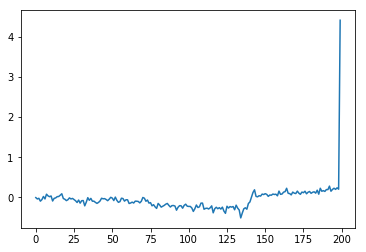

In [124]:
plt.plot(preds-y_val)
plt.show()

In [116]:
fi = rf_feat_importance(m_rf, trn); fi[:10]

,cols,imp
4,dayYear,0.505443
3,dayDayofyear,0.442741
5,dayWeek,0.022961
2,dayMonth,0.016375
19,pressure,0.003236
7,dayDayofweek,0.002744
30,moonPhase,0.000957
21,visibility,0.000693
26,temperatureLow,0.000630
18,windSpeed,0.000470


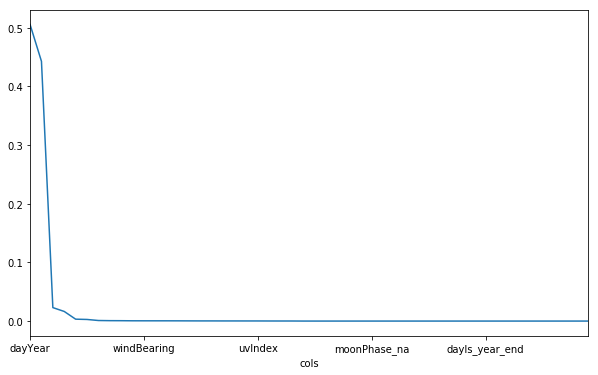

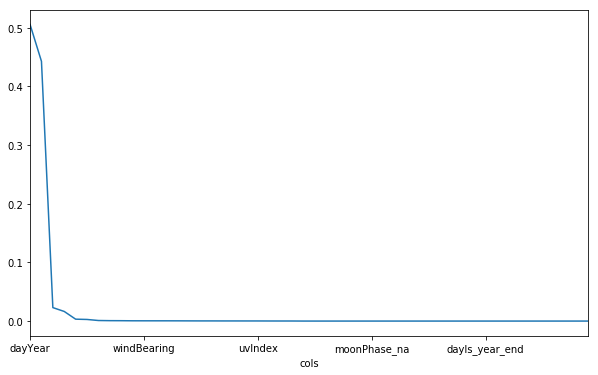

In [118]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);
plt.show()

In [119]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

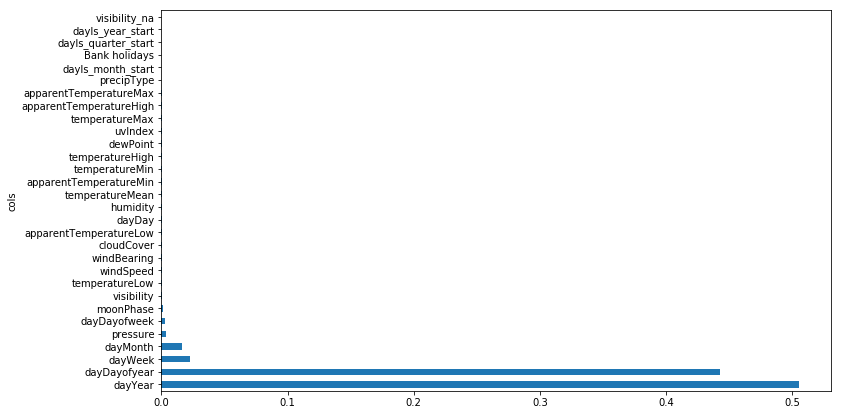

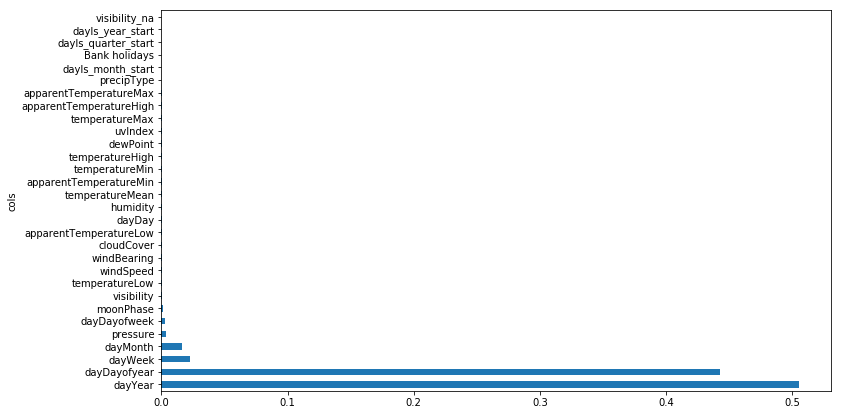

In [121]:
plot_fi(fi[:30]);
plt.show()